<a href="https://colab.research.google.com/github/Navdeep27/AI-ML/blob/Training/pima_indians_diabetes_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset (Pima Indians Diabetes dataset)
# You can download the dataset from 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
# Assuming you have it in CSV format
# Column Names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
           'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # All columns except the last one are features
y = data.iloc[:, -1].values   # The last column is the target (Outcome: 0 or 1)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Build the neural network model
model = Sequential()

# Adding layers
model.add(Dense(16, input_dim=8, activation='relu'))  # First hidden layer with 16 neurons, input size is 8 features
model.add(Dense(12, activation='relu'))               # Second hidden layer with 12 neurons
model.add(Dense(1, activation='sigmoid'))             # Output layer with 1 neuron (for binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.4900 - loss: 0.7379 - val_accuracy: 0.6039 - val_loss: 0.6849
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6701 - loss: 0.6373 - val_accuracy: 0.6429 - val_loss: 0.6295
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6925 - loss: 0.5852 - val_accuracy: 0.6558 - val_loss: 0.6001
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7319 - loss: 0.5246 - val_accuracy: 0.6883 - val_loss: 0.5782
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7078 - loss: 0.5319 - val_accuracy: 0.7013 - val_loss: 0.5640
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6924 - loss: 0.5277 - val_accuracy: 0.7273 - val_loss: 0.5552
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7568 - loss: 0.4808 - val_accuracy: 0.7403 - val_loss: 0.5490
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7406 - loss: 0.4741 - val_accuracy: 0.7468 - val_loss: 0.

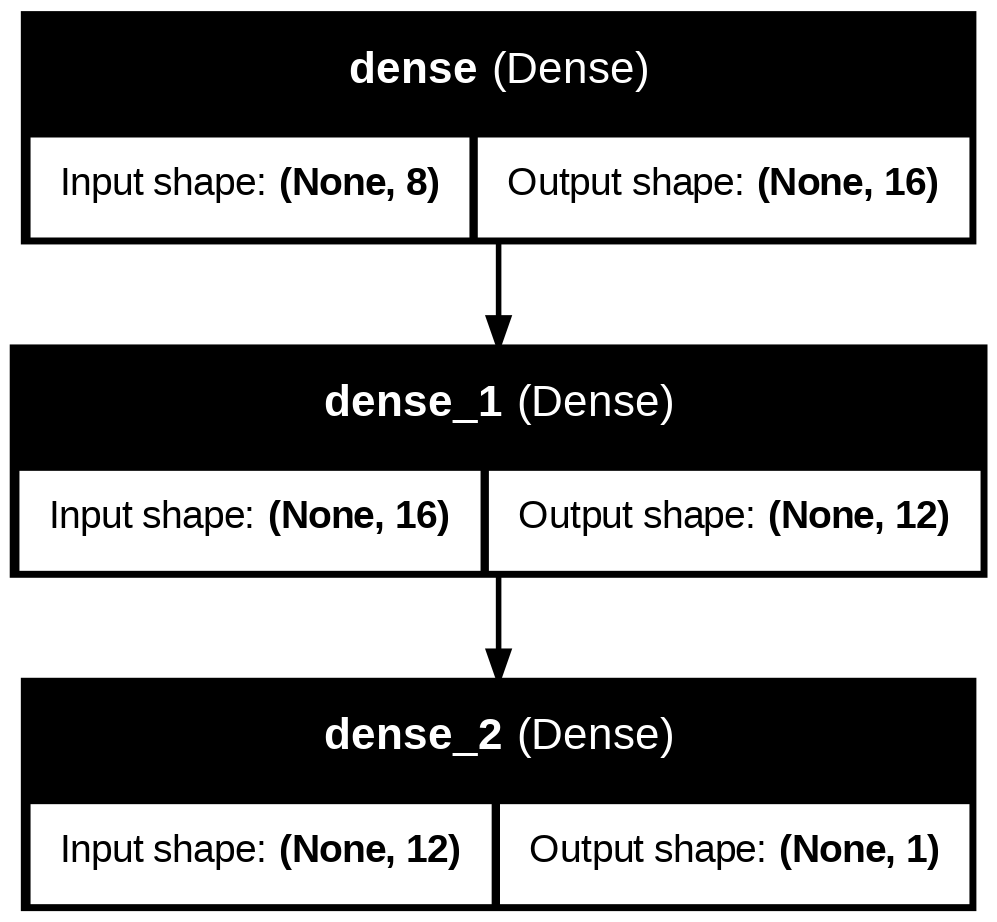

In [8]:
# Plot the model architecture and save it to a file
plot_model(model, to_file='neural_network_diagram.png', show_shapes=True, show_layer_names=True)

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict diabetes for new samples (3 new patients)
samples = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],   # Sample 1
                    [1, 85, 66, 29, 0, 26.6, 0.351, 31],    # Sample 2
                    [8, 183, 64, 0, 0, 23.3, 0.672, 32]])   # Sample 3

# Standardize the new data using the same scaler
samples_scaled = scaler.transform(samples)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.6560 
Test Accuracy: 71.43%


In [6]:
# Predict diabetes (returns probabilities)
predictions = model.predict(samples_scaled)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Output predictions
print("Predictions for the samples (0 = No Diabetes, 1 = Diabetes):")
print(predicted_classes.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predictions for the samples (0 = No Diabetes, 1 = Diabetes):
[1 0 1]
